<h1> K-means Algorithm </h1>
<h5> Basic info </h5>
<li> Clustering algorithm
<li> Unsupervised learning
<li> Algorithm creates k clusters of data
<li> Algorithm isn't deterministic - it's little random - sometimes result can be completely wrong - so we should get a few prediction and examines them


<h3> How it works? </h3>
<ol>
<li> Firstly we have to load our data - it will be in shape (m x n) - that means m rows (objects) and n columns (features)
<li> We have to set our k number - that determines how many clusters will be created
<li> Next step is to create new random array in shape (k x n) - so we create k random data objects - that will be called <strong> centers </strong>. I'm gonna simplify things a little - I'll just choose some random objects from dataset
<li> Then we are starting loop:
    <ol>
    <li>We are calculating distances between all centers and all datapoints - point will be classified to this centre that is the closest to him
    <li>Then we are calculating average coordinates of all the points belonging to particular centre - then centre is moving to this average location.
    <li>We are checking, if all centres stayed at their places we should break the loop - it will be infinite otherwise.
    </ol>
<li> After the loop we have all our points clusterized
</ol>

<h3> Import stuff </h3>
<p> I created additional file with code for calculating distances - it's in metrics.py file in utilities directory. I'm importing that file here </p>

In [1]:
import numpy as np
from utilities import metrics
import random
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


Configure matplotlib

In [2]:
plt.rcParams['figure.figsize'] = [16, 10]

<h3> My Kmeans class </h3>

In [50]:
class Kmeans():
    def __init__(self, k, max_i = 100, dist_method = "Euclidean"):
        self.k_ = k
        self.max_i_ = max_i

        if dist_method == "Euclidean":
            self.dist_func_ = metrics.EuclideanMetrics

    def fit_and_predict(self, X):
        """
        Function sets centres and assigns rows to centres.
        """
        shape = X.shape
        centers = random.sample(range(0, shape[0]), self.k_)
        C = X[centers, :].copy() # Matrix with coordinates of centers
        P = np.zeros((X.shape[0], self.k_)) # Matrix of beloning objects to centres
        # I'll use those two to compare results after every loop
        old_P = np.array([])
        old_C = np.array([])

        i = 0 # Counter - we're gonna exit loop after some time even if our centers won't be stable yet
        # That prevents from infinite loop

        while (not  np.array_equal(C, old_C)) and ( not  np.array_equal(P, old_P)):
            i += 1
            old_C = C.copy()
            old_P = P.copy()

            P = np.zeros((X.shape[0], self.k_))

            #Calculating to which centre every row belongs
            for i in range(shape[0]):
                d = self.dist_func_(X[i,:], C, 'matrix')
                col = np.argmin(d)
                P[i][col] = 1

            #Calculating new centres
            for j in range(self.k_):
                mean = np.mean(X[P[:, j]==1], axis=0)
                C[j] = mean

            if i > self.max_i_:
                break
        self.C_ = C
        return C, P

    def predict(self, X):
        """
        Function returns cluster that new point is belonging to
        """
        P = np.zeros((X.shape[0], self.k_))
        for i, row in X.iterrows():
                d = self.dist_func_(row, self.C_, 'matrix')
                col = np.argmin(d)
                P[i][col] = 1
        return P


<p>Important symbols:
<li>X - input dataset
<li>P - table of belonging
<li>C - centres</p>

<h3> Example 1 - generated blobs</h3>

I'm generating random data with make_blobs function from sklearn.

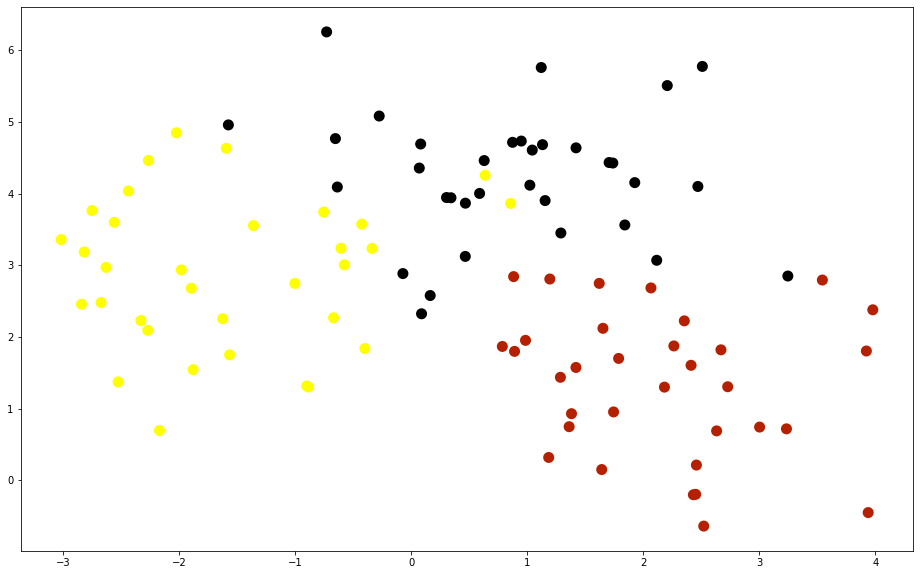

In [22]:
X, y = make_blobs(n_samples=100, centers=3, n_features=2,random_state=0)
plt.scatter(X[:, 0], X[:, 1], c = y, linewidths=5, cmap="gnuplot")
plt.show() 

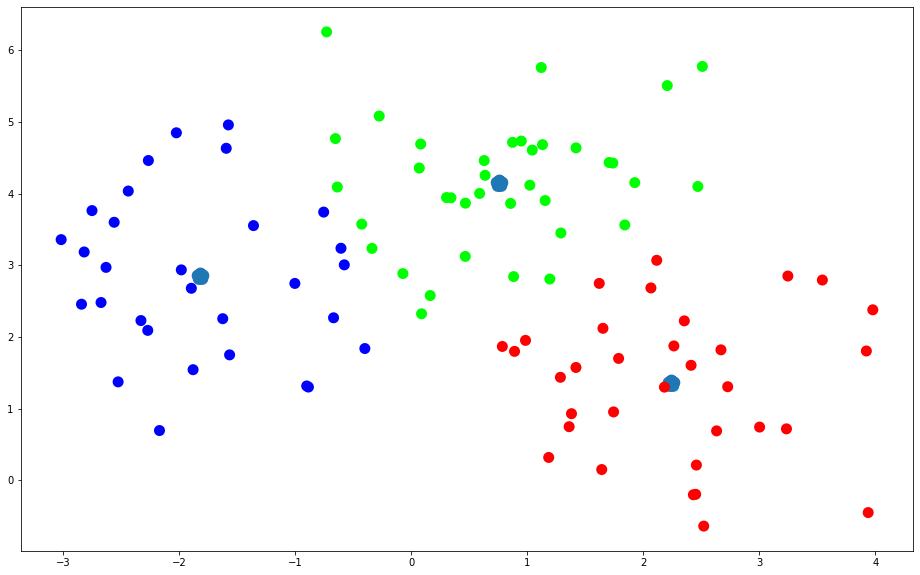

In [51]:

kmeans = Kmeans(3, 100)
centers, points = kmeans.fit_and_predict(X)
plt.scatter(centers[:, 0], centers[:, 1], cmap="gnuplot", linewidths=12, marker="*")
plt.scatter(X[:, 0], X[:, 1], c = points, linewidths=5, cmap="gnuplot")
plt.show() 